# 03-선형회귀

- 머신러닝의 가장 큰 목적은 실제 데이터를 바탕으로 모델을 생성해서 만약 다른 입력값을 넣었을 때 발생할 아웃풋을 예측하는 것.
- 가장 직관적이고 간단한 모델은 선(line)
- 데이터를 놓고 그걸 가장 잘 설명할 수 있는 선을 찾는 분석하는 방법을 선형회귀(Linear Regression) 분석이라고 부른다.

## 1) 선형회귀 예시

운동시간에 따른 칼로리 소모량을 예측

> 칼로리 소모량(Y) = W * 운동시간(X)

- 여기서 'W'를 가중치라고 한다.


실제 실험에서는 측정상의 오차나 실험 환경 상에서 발생하는 여러가지 변수(ex: 운동강도) 등의 영향을 통해 오차가 발생하게 된다.

이러한 오차를 확률변수 b로 표기하고 아래와 같이 수식이 변경된다.

> 칼로리 소모량(Y) = W * 운동시간(X) + b

## 2) 선형회귀 모델 구현하기

### 학습하고자 하는 가설을 선형 함수 형태로 표현

1차 방정식의 함수로 가설을 세운다. 여기에서는 아래의 수식이 가설이 된다.

> 칼로리 소모량(Y) = W * 운동시간(X) + b

- Variable로 운동시간, 칼로리 소모량, 가중치, 편향(오차)을 정의

가중치와 편향은 일반적으로 -1.0 에서 1.0 사이의 균등 분포를 가진 무작위 값으로 설정한다.

### 손실함수(Loss Function) 정의

손실함수란 한 쌍의 데이터(x,y)에 대한 손실값을 측정할 수 있는 함수.

손실값이란 실제값과 모델로 예측한 값이 얼마나 차이가 나는가를 나타내는 값.

손실값이 작을수록 그 모델이 X와 Y의 관계를 잘 설명하고 있다는 뜻.

손실을 전체 데이터에 대해 구한 경우 이를 비용(cost)이라고 한다.

손실함수는 여러가지 형태로 정의될 수 있으며 대표적인 손실함수 중 하나는 평균제곱오차(MSE)이다. (예측값과 실제값의 거리)


### 평균제곱오차

각 데이터 쌍에 대한 손실값을 예측값 y ^에서 실제값 y를 뺀 뒤 제곱하여 모두 더한 후 평균을 취한다.

## 3) 필요한 패키지 정의

In [1]:
import tensorflow as tf
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot

## 4) 측정을 통해 얻어진 학습 데이터

In [36]:
운동시간 = [1,2,3,4,5,6,7,8,9,10,11,12]
칼로리소비량 = [100,140,210,248,290,362,411,430,480,510,560,590]

## 5) TF1 버전 코드

모든 코드가 세션을 생성하는 블록 `with tf.compat.v1.Session() as ses: ` 안에서 한 번에 구현되어야 한다.

In [37]:
# 세션을 통해 실행하기
with tf.compat.v1.Session() as ses:
    # 운동시간 데이터를 적용할 placeholder (=변수)
    X = tf.compat.v1.placeholder(dtype = tf.float32, name = 'X')
    
    # 칼로리소비량 데이터를 적용할 placeholder (=변수) : 선언을 먼저 하고 할당을 나중에 하는?
    Y = tf.compat.v1.placeholder(dtype = tf.float32, name = 'Y')
    
    # 가중치 정의 --> 균등분포를 갖는 -1.0 ~ 1.0 사이의 랜덤값 변수로 정의
    W = tf.Variable(tf.random.uniform(shape = [1], minval = -1.0, maxval = 1.0), name = 'W')
    
    # 편향 정의 --> 균등분포를 갖는 -1.0 ~ 1.0 사이의 랜덤값 변수로 정의
    b = tf.Variable(tf.random.uniform(shape = [1], minval = -1.0, maxval = 1.0), name = 'b')
    
    # 선형회귀 모델 정의 --> 예측값
    h = W * X + b
    
    # 손실함수 정의
    # --> tf.square(h - Y) : 예측값h에서 실제 측정값 Y를 뺀 값들의 합
    # --> tf.reduce_mean : 이 값들에 대한 전체 평균
    cost = tf.reduce_mean(tf.square(h - Y))
    
    # 최적화를 위한 경사하강법(그라디언트 디센트) 옵티마이저 정의 --> 손실값들 중에 가장 최적화된 기울기를 찾는 방법?
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.01)
    
    # 옵티마이저가 최적화 할 손실함수를 설정하고 최적화 연산을 정의한다.
    # -> train_op가 1회 실행할 경우 손실 함수와 연관된 파라미터를 한 스텝 업데이트 한다.
    train_op = optimizer.minimize(cost)
    
    # 변수값 초기화
    ses.run(tf.compat.v1.global_variables_initializer())
    
    # 경사하강법 100회 수행
    for i in range(100):
        ses.run(train_op, feed_dict = {X: 운동시간, Y: 칼로리소비량})
        
    
    # 학습결과 테스트
    # -> 운동시간 12분을 초과했을 때에 대한 칼로리소비량을 예측
    print('\n== Test ==\n')
    for i in range(13, 31):
        str = "운동시간 %d분 경과시 예상 칼로리 소비량 -> %s"
        v = ses.run(h, feed_dict = {X: i})
        print(str%(i, v[0]))
        
        # 측정데이터에 예측값 추가
        운동시간.append(i)
        칼로리소비량.append(v[0])


== Test ==

운동시간 13분 경과시 예상 칼로리 소비량 -> 676.8327
운동시간 14분 경과시 예상 칼로리 소비량 -> 726.77594
운동시간 15분 경과시 예상 칼로리 소비량 -> 776.71924
운동시간 16분 경과시 예상 칼로리 소비량 -> 826.6625
운동시간 17분 경과시 예상 칼로리 소비량 -> 876.6057
운동시간 18분 경과시 예상 칼로리 소비량 -> 926.549
운동시간 19분 경과시 예상 칼로리 소비량 -> 976.49225
운동시간 20분 경과시 예상 칼로리 소비량 -> 1026.4355
운동시간 21분 경과시 예상 칼로리 소비량 -> 1076.3788
운동시간 22분 경과시 예상 칼로리 소비량 -> 1126.322
운동시간 23분 경과시 예상 칼로리 소비량 -> 1176.2653
운동시간 24분 경과시 예상 칼로리 소비량 -> 1226.2085
운동시간 25분 경과시 예상 칼로리 소비량 -> 1276.1517
운동시간 26분 경과시 예상 칼로리 소비량 -> 1326.0951
운동시간 27분 경과시 예상 칼로리 소비량 -> 1376.0383
운동시간 28분 경과시 예상 칼로리 소비량 -> 1425.9816
운동시간 29분 경과시 예상 칼로리 소비량 -> 1475.9248
운동시간 30분 경과시 예상 칼로리 소비량 -> 1525.8682


### 학습 결과를 데이터프레임으로 변환

In [38]:
# 수집된 '운동시간', '칼로리소비량' 데이터를 DataFrame으로 변환한 후 시각화
df = DataFrame(칼로리소비량, index = 운동시간, columns = ['칼로리소비량'])
df

,칼로리소비량
1,100.000000
2,140.000000
3,210.000000
4,248.000000
5,290.000000
6,362.000000
7,411.000000
8,430.000000
9,480.000000
10,510.000000


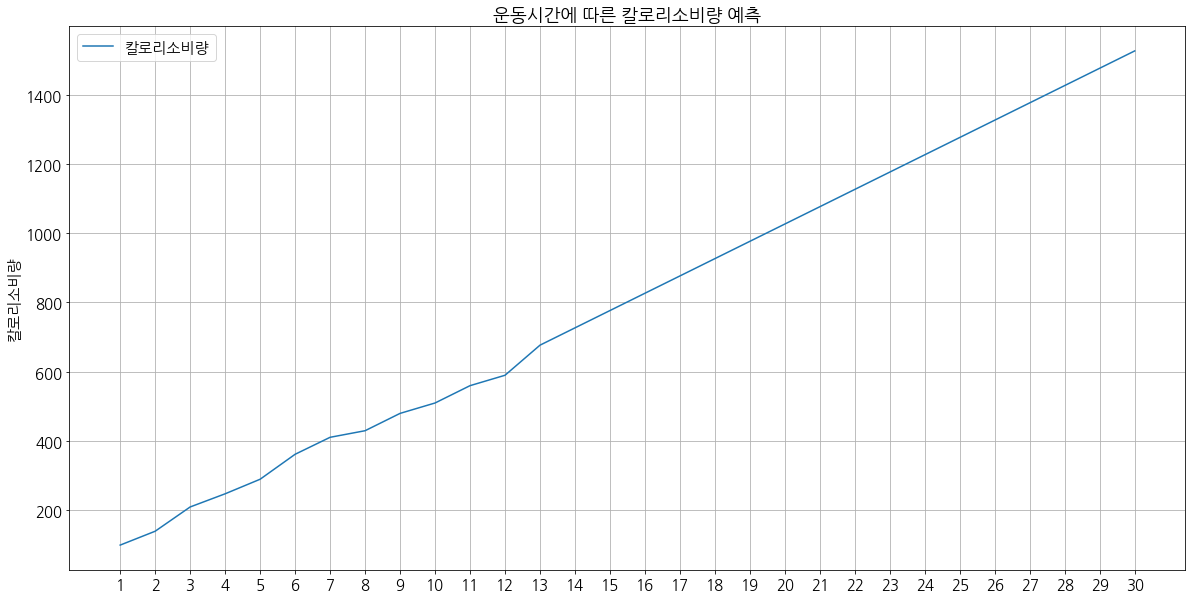

In [39]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams['font.family'] = 'NanumGothic'
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['figure.figsize'] = (20,10)

# 특정 컬럼에 대해서만 시각화하기
df.plot()
pyplot.grid()
pyplot.legend()
pyplot.title('운동시간에 따른 칼로리소비량 예측')
pyplot.ylabel('칼로리소비량')
pyplot.xticks(df.index, 운동시간)
pyplot.show()

## 6) TF2 버전의 코드

In [45]:
운동시간 = [1,2,3,4,5,6,7,8,9,10,11,12]
칼로리소비량 = [100,140,210,248,290,362,411,430,480,510,560,590]

model = tf.keras.Sequential(tf.keras.layers.Dense(1, input_dim = 1, activation = 'linear'))  # linear : 선형회귀
# 여기서 Dense에 내장되어있는 함수식이 y = f(Wx + b)이다.
# TF1 코드에서 작성했던 h = W * X + b 와 같다.

# sgd는 경사하강법을 의미. 학습률(learning rate, lr)은 0.01
sgd = tf.keras.optimizers.SGD(lr = 0.01)

# 손실함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 100번 시도합니다.
model.fit(운동시간, 칼로리소비량, batch_size = 1, epochs = 100, shuffle = False)   # shuffle : 값을 섞냐 안섞냐

Epoch 1/100
12/12 [==============================] - 0s 831us/step - loss: 9545.0410 - mse: 9545.0410
Epoch 2/100
12/12 [==============================] - 0s 831us/step - loss: 2017.2080 - mse: 2017.2080
Epoch 3/100
12/12 [==============================] - 0s 665us/step - loss: 1921.8564 - mse: 1921.8564
Epoch 4/100
12/12 [==============================] - 0s 665us/step - loss: 1835.2539 - mse: 1835.2539
Epoch 5/100
12/12 [==============================] - 0s 665us/step - loss: 1756.6885 - mse: 1756.6885
Epoch 6/100
12/12 [==============================] - 0s 665us/step - loss: 1685.5089 - mse: 1685.5089
Epoch 7/100
12/12 [==============================] - 0s 831us/step - loss: 1621.1138 - mse: 1621.1138
Epoch 8/100
12/12 [==============================] - 0s 831us/step - loss: 1562.9398 - mse: 1562.9398
Epoch 9/100
12/12 [==============================] - 0s 748us/step - loss: 1510.4731 - mse: 1510.4731
Epoch 10/100
12/12 [==============================] - 0s 582us/step - loss: 1463.2

In [46]:
input_data = list(range(13, 31))
k = model.predict(input_data)

칼로리소비량

X = 칼로리소비량.copy()

In [47]:
for v in k:
    X.append(v[0])
    
X

[100,
 140,
 210,
 248,
 290,
 362,
 411,
 430,
 480,
 510,
 560,
 590,
 488.48325,
 516.9072,
 545.33124,
 573.75525,
 602.17926,
 630.6033,
 659.0273,
 687.4513,
 715.8753,
 744.2993,
 772.7233,
 801.14734,
 829.57135,
 857.99536,
 886.4194,
 914.8434,
 943.2674,
 971.6914]

In [48]:
Y = 운동시간 + input_data
Y

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [49]:
df = DataFrame(X, index = Y, columns = ['칼로리소비량'])
df

,칼로리소비량
1,100.000000
2,140.000000
3,210.000000
4,248.000000
5,290.000000
6,362.000000
7,411.000000
8,430.000000
9,480.000000
10,510.000000


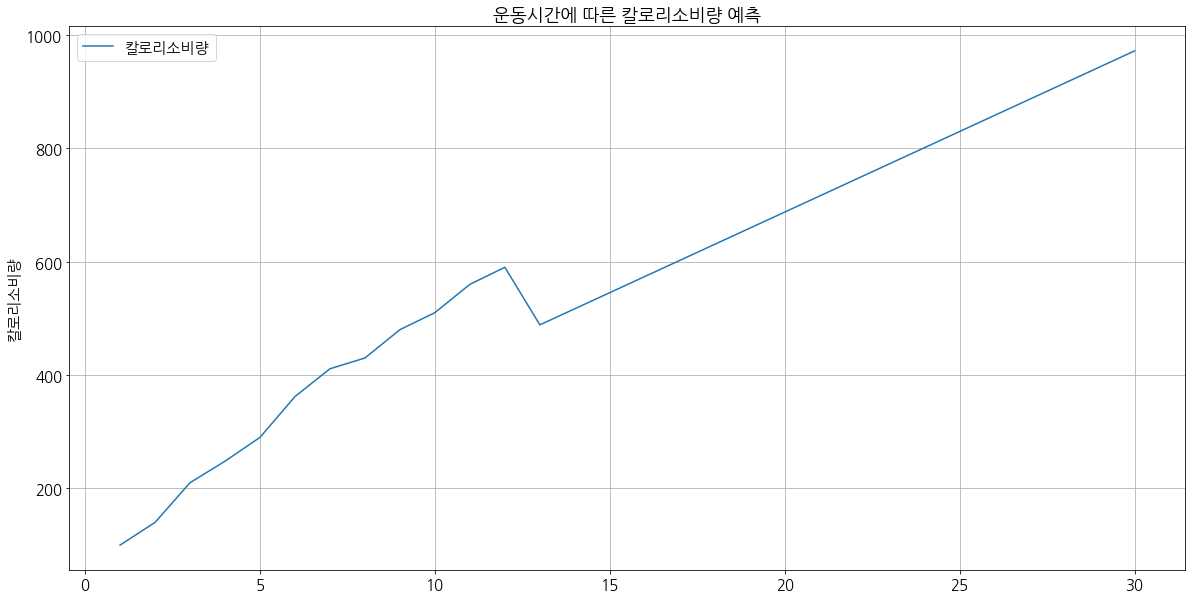

In [51]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams['font.family'] = 'NanumGothic'
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['figure.figsize'] = (20,10)

# 특정 컬럼에 대해서만 시각화하기
df.plot()
pyplot.grid()
pyplot.legend()
pyplot.title('운동시간에 따른 칼로리소비량 예측')
pyplot.ylabel('칼로리소비량')
pyplot.show()

- 중간에 떨어지는 부분은 오차값이 존재하기 때문에 다른 작업이 필요하지만.. 어쨌든 비례하는 모습을 보이므로 적절한 예측이 맞다.